<a href="https://colab.research.google.com/github/johyunkang/adp_certificate/blob/main/adp_23_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADP 23회
출처 : https://www.datamanim.com/dataset/ADPpb/00/p5.html

**답지 보지 않고 작업 수행**

## 1번
온, 습도, 조도, CO2농도에 따른 객실의 사용유무 판별

종속변수 : Occupance (0:비어있음, 1: 사용중)

데이터 출처 : https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

data Url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem1.csv

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem1.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.40,0.004773,1
1,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.75,0.004744,1
2,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.00,0.004767,1
3,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.00,0.004779,1
4,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.00,0.004783,1


### 1-1
데이터 EDA 수행 후, 분석가 입장에서 의미있는 탐색

In [ ]:
print(df.info())
display(df.describe())
print('\n\n')
print('##### NULL CHECK #####')
display(df.isnull().sum())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17910 entries, 0 to 17909
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17910 non-null  object 
 1   Temperature    17910 non-null  float64
 2   Humidity       17910 non-null  float64
 3   Light          17910 non-null  float64
 4   CO2            17889 non-null  float64
 5   HumidityRatio  17910 non-null  float64
 6   Occupancy      17910 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 979.6+ KB
None


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,17910.000000,17910.000000,17910.000000,17889.000000,17910.000000,17910.000000
mean,20.749036,27.589163,78.157369,647.700865,0.004175,0.117253
std,0.994012,5.043595,168.574068,285.997340,0.000755,0.321730
min,19.000000,16.745000,-99.000000,412.750000,0.002674,0.000000
25%,20.100000,24.390000,0.000000,453.000000,0.003702,0.000000
50%,20.600000,27.200000,0.000000,532.666667,0.004222,0.000000
75%,21.200000,31.290000,22.000000,722.000000,0.004790,0.000000
max,24.408333,39.500000,1581.000000,2076.500000,0.006461,1.000000





##### NULL CHECK #####


date              0
Temperature       0
Humidity          0
Light             0
CO2              21
HumidityRatio     0
Occupancy         0
dtype: int64

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.40,0.004773,1
1,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.75,0.004744,1
2,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.00,0.004767,1
3,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.00,0.004779,1
4,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.00,0.004783,1


## 이상치 분석 ## 


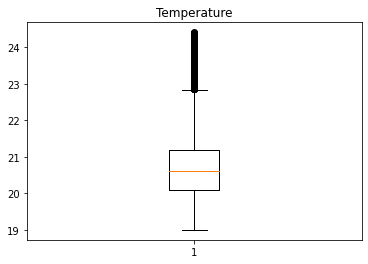

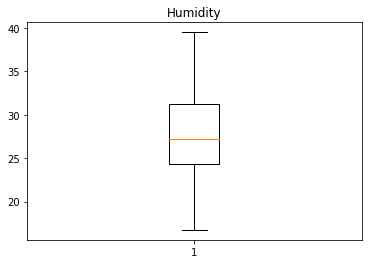

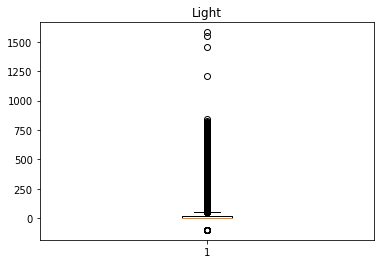

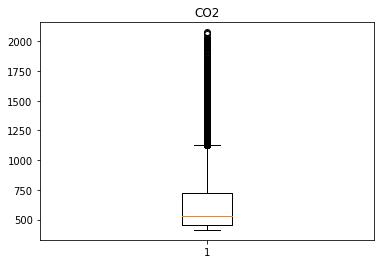

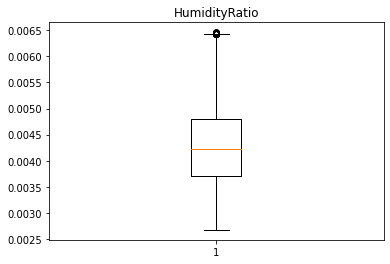

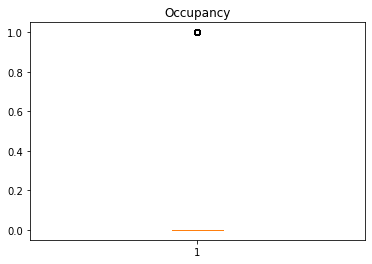

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.199284,0.625230,0.399370,0.138071,0.453281
Humidity,-0.199284,1.000000,-0.052119,0.254446,0.941568,0.032376
Light,0.625230,-0.052119,1.000000,0.354062,0.163272,0.867240
CO2,0.399370,0.254446,0.354062,1.000000,0.409735,0.409959
HumidityRatio,0.138071,0.941568,0.163272,0.409735,1.000000,0.198232
Occupancy,0.453281,0.032376,0.867240,0.409959,0.198232,1.000000


In [ ]:
print('## 이상치 분석 ## ')

import matplotlib.pyplot as plt
df_plot = df[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']]
# df_plot.boxplot(column=['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy'])

for col in ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy'] :
    plt.boxplot(df[col].dropna())
    plt.title(col)
    plt.show()


display(df_plot.corr())